In [1]:
import pandas as pd
import re
import emoji
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = "./_chat_grupo_hermana_bachillerato.txt"
regex = "\[([^\]]*)] ([^:\[]*):([^\[]*)"
columns = ["Datetime", "User", "message"]
emojis = ("|".join(emoji.UNICODE_EMOJI["en"])).replace("*", "\*")

In [5]:
with open(path, encoding="utf-8") as f:

    chat = f.read()

    messages = re.findall(regex, chat)

    df = pd.DataFrame(messages, columns = columns)

In [6]:
df.Datetime = pd.to_datetime(df.Datetime)

In [7]:
df.head()

,Datetime,User,message
0,2019-02-06 10:01:10,F•I•R•E•N•D•S,‎Messages and calls are end-to-end encrypted....
1,2020-04-07 13:44:54,Compañero_2,como vais a llevar la comida? en plan en plat...
2,2020-04-07 13:55:06,Compañero_1,‎audio omitted\n‎
3,2020-04-07 13:56:47,Hermana,‎audio omitted\n
4,2020-04-07 13:58:44,Compañero_2,ladrona de tapperwes\n


## Top emoji users

In [8]:
emoji_messages = df.loc[df.message.str.contains(emojis)].User.value_counts()

Text(0, 0.5, 'Number of messages with emojis')

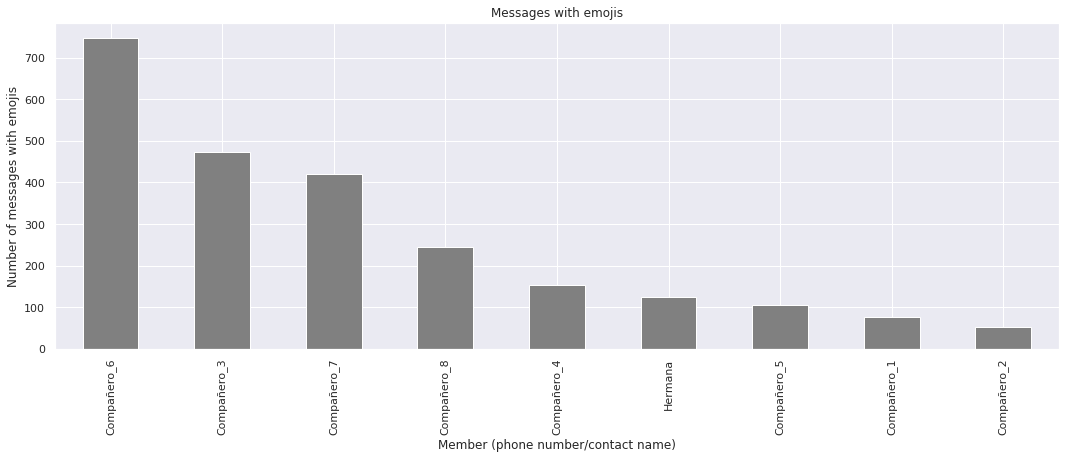

In [9]:
sns.set()
emoji_messages_plot = emoji_messages.plot(kind='bar', legend=None, title="Messages with emojis", figsize=(18, 6), color="gray")
emoji_messages_plot.set_xlabel("Member (phone number/contact name)")
emoji_messages_plot.set_ylabel("Number of messages with emojis")

## Número de mensajes por días de la semana

In [10]:
weekdays = df.Datetime.dt.day_name().value_counts()

Text(0, 0.5, 'Number of messages')

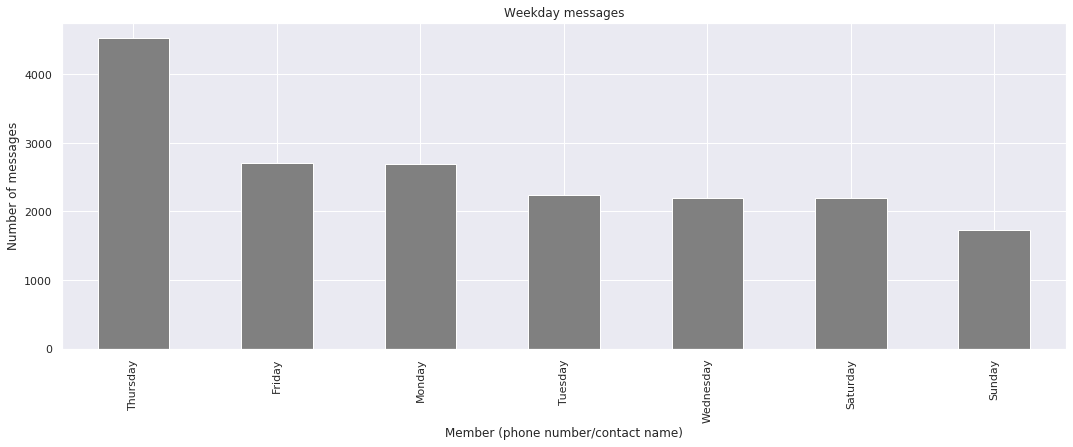

In [11]:
sns.set()
weekday_plot = weekdays.plot(kind='bar', legend=None, title="Weekday messages", figsize=(18, 6), color="gray")
weekday_plot.set_xlabel("Member (phone number/contact name)")
weekday_plot.set_ylabel("Number of messages")

## Menciones

In [12]:
menciones = df.message.str.extract("@([^ ]*) ", expand = False).dropna().value_counts()

Text(0, 0.5, 'Number of menciones')

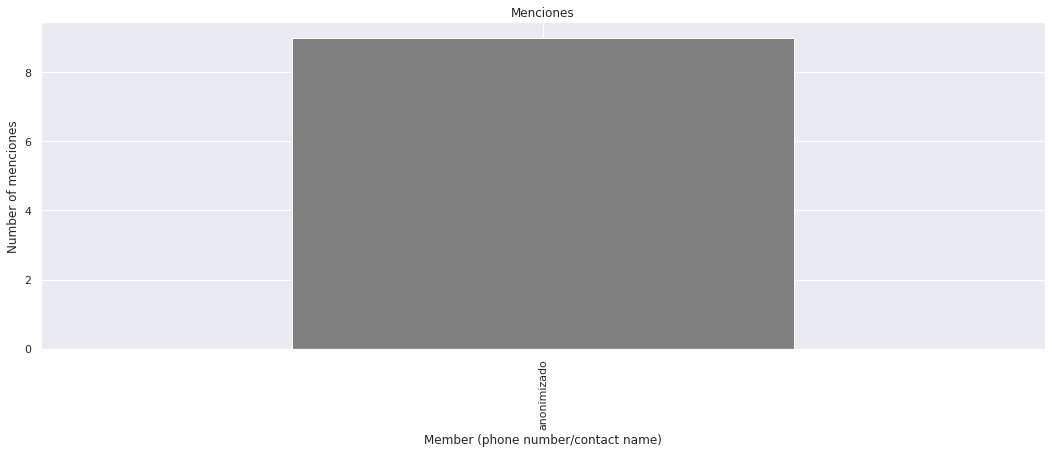

In [13]:
sns.set()
menciones_plot = menciones.plot(kind='bar', legend=None, title="Menciones", figsize=(18, 6), color="gray")
menciones_plot.set_xlabel("Member (phone number/contact name)")
menciones_plot.set_ylabel("Number of menciones")

## Cuantos mensajes escribe cada persona

In [14]:
mensajes = df.User.value_counts()

Text(0, 0.5, 'Number of mensajes')

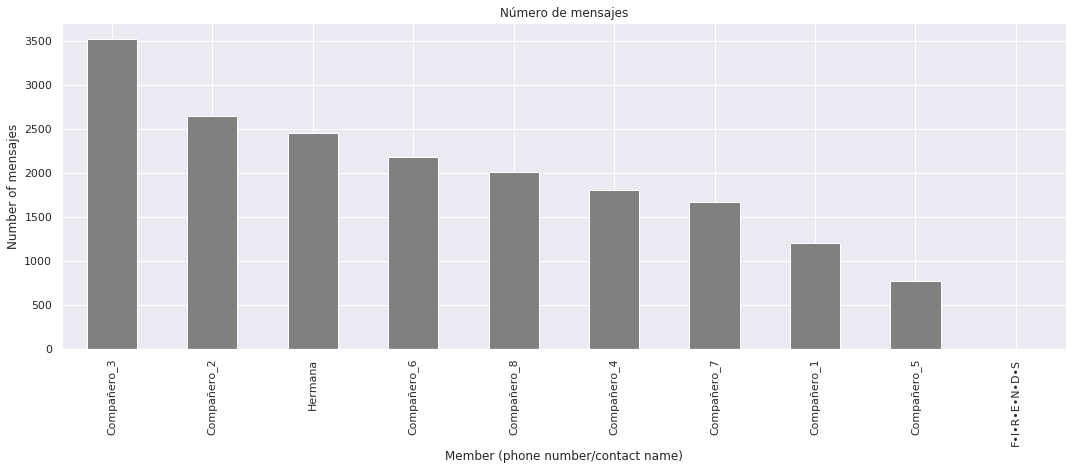

In [15]:
sns.set()
mensajes_plot = mensajes.plot(kind='bar', legend=None, title="Número de mensajes", figsize=(18, 6), color="gray")
mensajes_plot.set_xlabel("Member (phone number/contact name)")
mensajes_plot.set_ylabel("Number of mensajes")

## Número de imagenes

In [16]:
n_imagenes = df.loc[df.message.str.contains("image omitted")].User.value_counts()

Text(0, 0.5, 'Number of images')

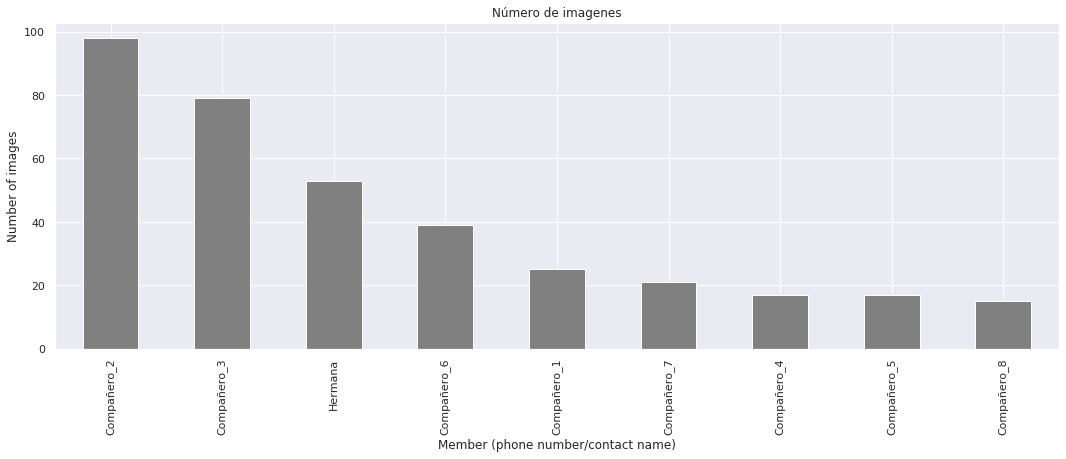

In [17]:
sns.set()
n_imagenes_plot = n_imagenes.plot(kind='bar', legend=None, title="Número de imagenes", figsize=(18, 6), color="gray")
n_imagenes_plot.set_xlabel("Member (phone number/contact name)")
n_imagenes_plot.set_ylabel("Number of images")

## Número de mensajes por hora del día

In [18]:
hora_dia = df.Datetime.dt.hour.value_counts()

Text(0, 0.5, 'Number of mensajes')

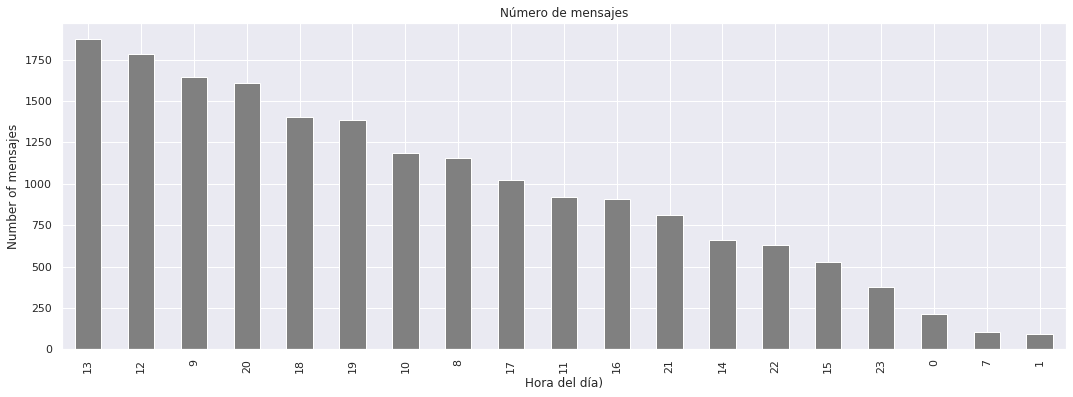

In [19]:
sns.set()
hora_dia_plot = hora_dia.plot(kind='bar', legend=None, title="Número de mensajes", figsize=(18, 6), color="gray")
hora_dia_plot.set_xlabel("Hora del día)")
hora_dia_plot.set_ylabel("Number of mensajes")

## Cuantas veces están perdidos

In [20]:
perdidos = df.loc[df.message.str.contains("estoy perdid|no entiendo", flags = re.IGNORECASE)].User.value_counts()

Text(0, 0.5, 'Number of mensajes')

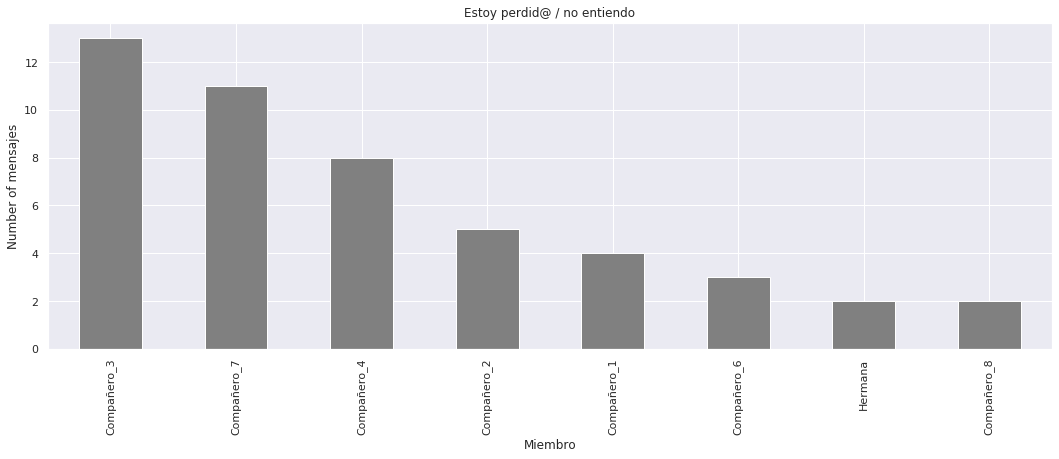

In [21]:
sns.set()
perdidos_plot = perdidos.plot(kind='bar', legend=None, title="Estoy perdid@ / no entiendo", figsize=(18, 6), color="gray")
perdidos_plot.set_xlabel("Miembro")
perdidos_plot.set_ylabel("Number of mensajes")


## Quién se ríe más

In [22]:
risas = df.loc[df.message.str.contains("(ja)*", flags = re.IGNORECASE)].User.value_counts()

Text(0, 0.5, 'Number of mensajes')

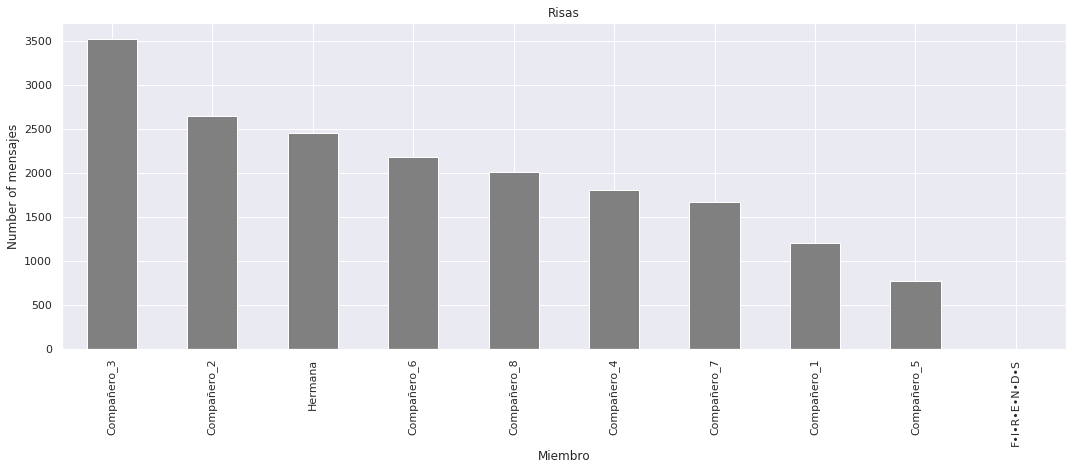

In [23]:
sns.set()
risas_plot = risas.plot(kind='bar', legend=None, title="Risas", figsize=(18, 6), color="gray")
risas_plot.set_xlabel("Miembro")
risas_plot.set_ylabel("Number of mensajes")

## F**k!

In [24]:
fucks = df.loc[df.message.str.contains("fuck", flags = re.IGNORECASE)].User.value_counts()

Text(0, 0.5, 'Number of mensajes')

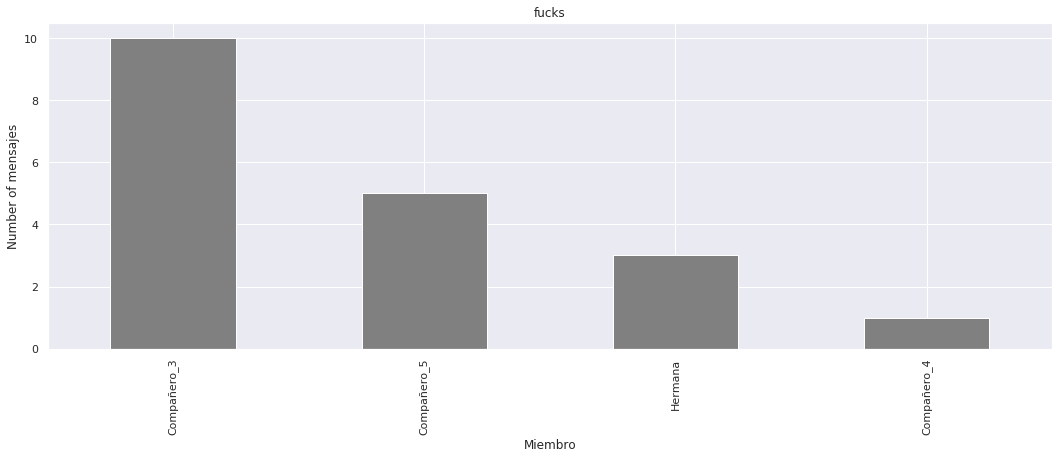

In [25]:
sns.set()
fucks_plot = fucks.plot(kind='bar', legend=None, title="fucks", figsize=(18, 6), color="gray")
fucks_plot.set_xlabel("Miembro")
fucks_plot.set_ylabel("Number of mensajes")

## Necesita validación social

In [26]:
quedamos = df.loc[df.message.str.contains("quedamos", flags = re.IGNORECASE)].User.value_counts()

Text(0, 0.5, 'Number of mensajes')

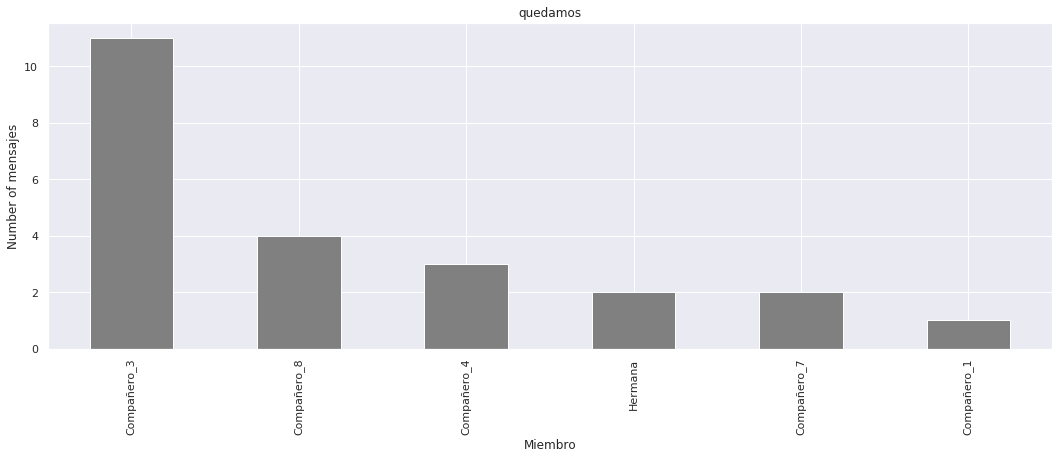

In [27]:
sns.set()
quedamos_plot = quedamos.plot(kind='bar', legend=None, title="quedamos", figsize=(18, 6), color="gray")
quedamos_plot.set_xlabel("Miembro")
quedamos_plot.set_ylabel("Number of mensajes")

## Pesado de los stickers

In [28]:
stickers = df.loc[df.message.str.contains("‎sticker omitted", flags = re.IGNORECASE)].User.value_counts()

Text(0, 0.5, 'Number of mensajes')

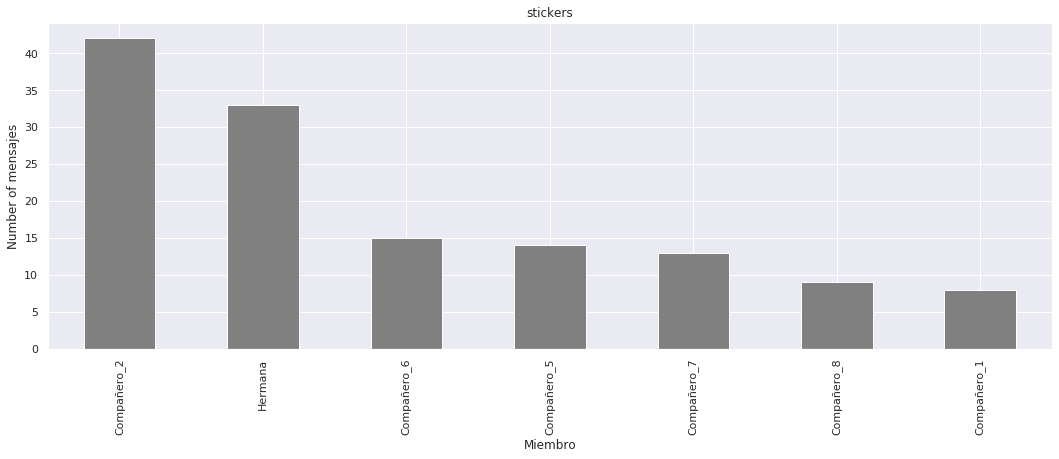

In [29]:
sns.set()
stickers_plot = stickers.plot(kind='bar', legend=None, title="stickers", figsize=(18, 6), color="gray")
stickers_plot.set_xlabel("Miembro")
stickers_plot.set_ylabel("Number of mensajes")

## Día con más mensajes

In [30]:
dates = df.Datetime.dt.date.value_counts()[0:10]

Text(0, 0.5, 'Number of mensajes')

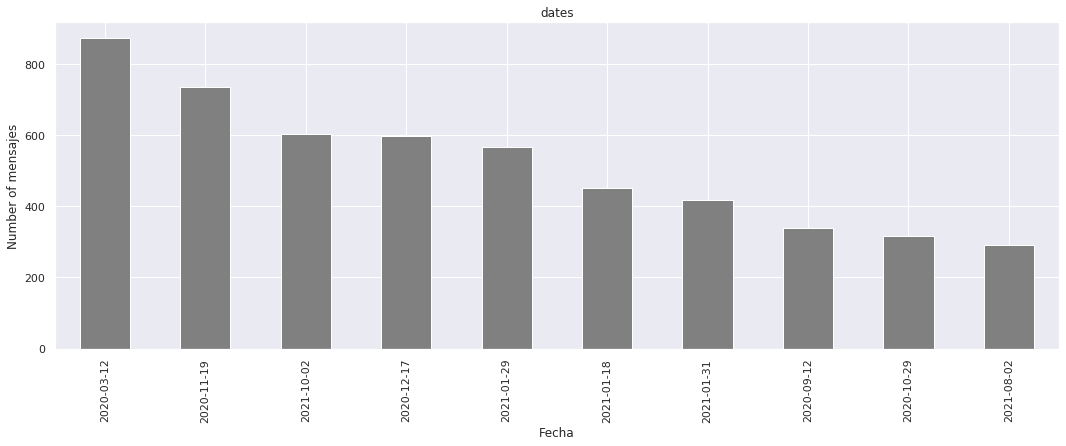

In [31]:
sns.set()
dates_plot = dates.plot(kind='bar', legend=None, title="dates", figsize=(18, 6), color="gray")
dates_plot.set_xlabel("Fecha")
dates_plot.set_ylabel("Number of mensajes")

## Usuario primero en hablar

In [32]:
primero = df.groupby(df.Datetime.dt.date).head(1).User.value_counts()

Text(0, 0.5, 'Number of mensajes')

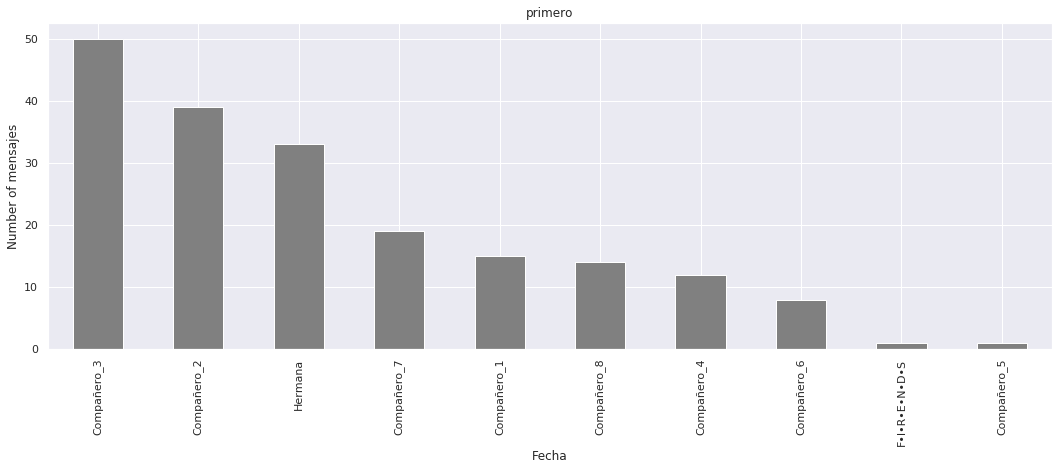

In [33]:
sns.set()
primero_plot = primero.plot(kind='bar', legend=None, title="primero", figsize=(18, 6), color="gray")
primero_plot.set_xlabel("Fecha")
primero_plot.set_ylabel("Number of mensajes")

## Último en hablar

In [34]:
ultimo = df.groupby(df.Datetime.dt.date).tail(1).User.value_counts()

Text(0, 0.5, 'Number of mensajes')

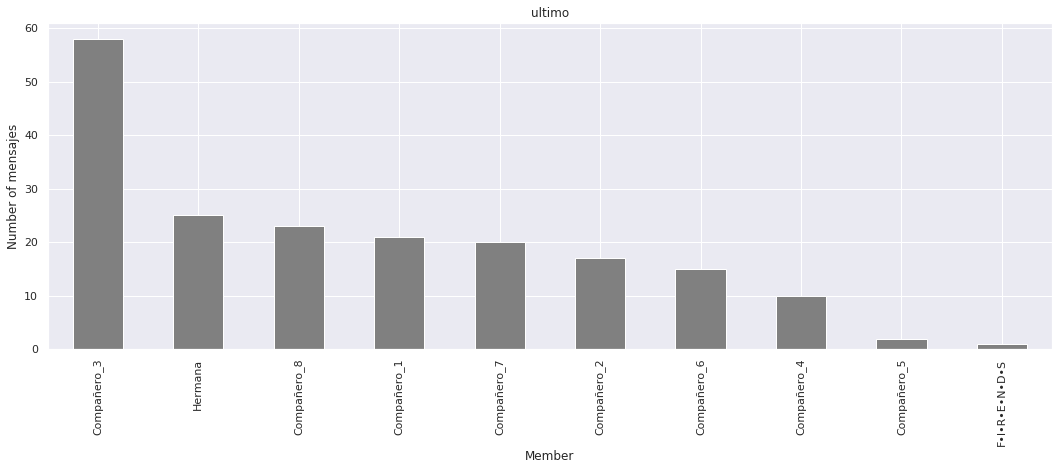

In [35]:
sns.set()
ultimo_plot = ultimo.plot(kind='bar', legend=None, title="ultimo", figsize=(18, 6), color="gray")
ultimo_plot.set_xlabel("Member")
ultimo_plot.set_ylabel("Number of mensajes")